In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install hmmlearn
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=4322c6ddc89db55fce45c90da0400c98f11d70b6250f9b7f2bf88658693e34b4
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Most likely hidden states: [0 0 0 0 2 2]
Log Probability: -16.592782228108433
Most likely hidden states using Viterbi: [0 0 0 0 2 2]


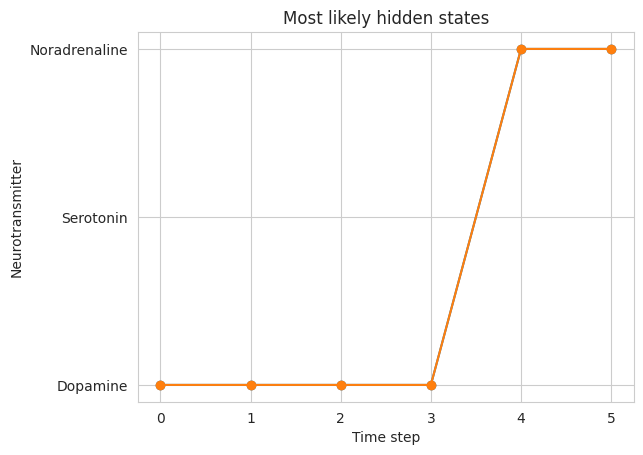

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

transition_probability = np.array([[0.6, 0.2, 0.2], [0.3, 0.4, 0.3], [0.1, 0.3, 0.6]])

emission_probability = np.array([[0.05, 0.2, 0.4, 0.05, 0.1, 0.1, 0.05, 0.05],
                                 [0.1, 0.1, 0.3, 0.05, 0.1, 0.1, 0.2, 0.05],
                                 [0.2, 0.05, 0.1, 0.2, 0.05, 0.2, 0.15, 0.05]])

model = hmm.CategoricalHMM(n_components=3, n_iter=100)
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)

hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

log_probability, hidden_states = model.decode(observations_sequence, algorithm='viterbi')
print('Log Probability:', log_probability)
print("Most likely hidden states using Viterbi:", hidden_states)

# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Dopamine or Serotonin or Noradrenaline")

state_names = ["Dopamine", "Serotonin", "Noradrenaline"]

sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Neurotransmitter')
plt.title("Most likely hidden states")
plt.yticks(range(len(state_names)), state_names)
plt.show()


51.66666666666662
Membership percentage for 'low' fan speed: 0.00%
Membership percentage for 'medium' fan speed: 96.67%
Membership percentage for 'high' fan speed: 3.33%


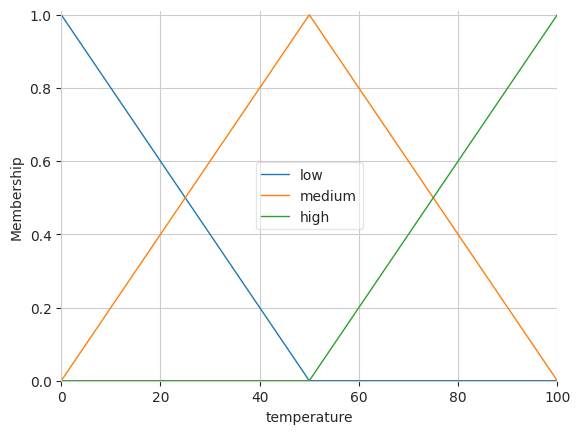

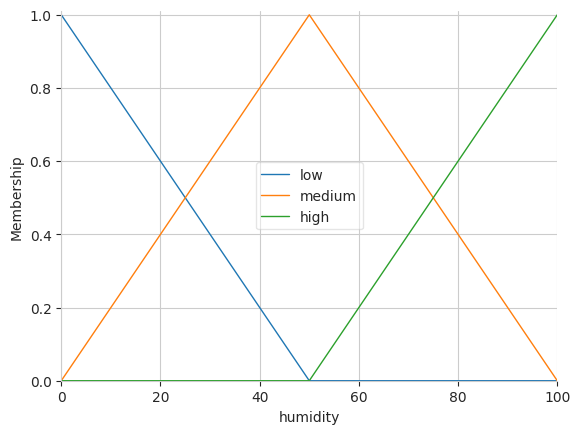

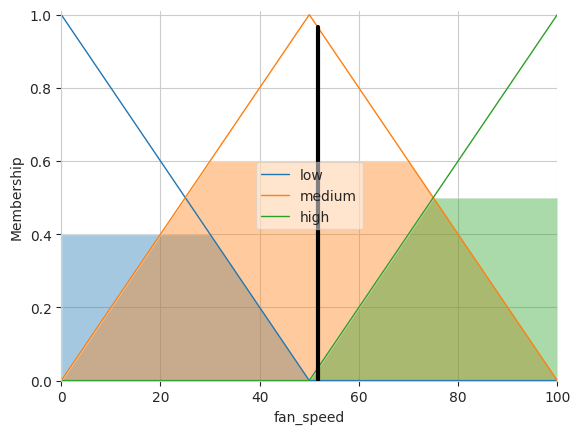

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the fuzzy variables and membership functions
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Define the membership functions for each variable
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 100, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Define the fuzzy rules
rule1 = ctrl.Rule(temperature['low'] | humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['medium'] | humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'] | humidity['high'], fan_speed['high'])

# Create the control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Create the control system simulation
fan_speed_ctrl = ctrl.ControlSystemSimulation(fan_ctrl)

# Pass inputs to the control system and compute the output
fan_speed_ctrl.input['temperature'] = 75
fan_speed_ctrl.input['humidity'] = 30
fan_speed_ctrl.compute()

# Print the computed output
print(fan_speed_ctrl.output['fan_speed'])

# Plot the membership functions and the output
temperature.view()
humidity.view()
fan_speed.view(sim=fan_speed_ctrl)
fan_speed_low = fuzz.interp_membership(fan_speed.universe, fan_speed['low'].mf, fan_speed_ctrl.output['fan_speed'])
fan_speed_medium = fuzz.interp_membership(fan_speed.universe, fan_speed['medium'].mf, fan_speed_ctrl.output['fan_speed'])
fan_speed_high = fuzz.interp_membership(fan_speed.universe, fan_speed['high'].mf, fan_speed_ctrl.output['fan_speed'])

# Print the membership percentages
print(f"Membership percentage for 'low' fan speed: {fan_speed_low*100:.2f}%")
print(f"Membership percentage for 'medium' fan speed: {fan_speed_medium*100:.2f}%")
print(f"Membership percentage for 'high' fan speed: {fan_speed_high*100:.2f}%")

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random

# Create universe variables
x = np.arange(0, 1, 0.001)
y = np.arange(0, 1, 0.001)
z = np.arange(0, 1, 0.001)
plutchik_range = np.arange(-1, 1, 0.001)

# Create the three fuzzy variables - serotonin, noradrenaline, and dopamine
serotonin = ctrl.Antecedent(x, 'serotonin')
noradrenaline = ctrl.Antecedent(y, 'noradrenaline')
dopamine = ctrl.Antecedent(z, 'dopamine')
joy_axis = ctrl.Consequent(plutchik_range, 'joy_axis')
disgust_axis = ctrl.Consequent(plutchik_range, 'disgust_axis')
fear_axis = ctrl.Consequent(plutchik_range, 'fear_axis')
surprise_axis = ctrl.Consequent(plutchik_range, 'surprise_axis')

# Generate fuzzy membership functions
serotonin['low'] = fuzz.trimf(x, [0, 0, 0.5])
serotonin['medium'] = fuzz.trimf(x, [0, 0.5, 1])
serotonin['high'] = fuzz.trimf(x, [0.5, 1, 1])

noradrenaline['low'] = fuzz.trimf(y, [0, 0, 0.5])
noradrenaline['medium'] = fuzz.trimf(y, [0, 0.5, 1])
noradrenaline['high'] = fuzz.trimf(y, [0.5, 1, 1])

dopamine['low'] = fuzz.trimf(z, [0, 0, 0.5])
dopamine['medium'] = fuzz.trimf(z, [0, 0.5, 1])
dopamine['high'] = fuzz.trimf(z, [0.5, 1, 1])

# serotonin.view()
# noradrenaline.view()
# dopamine.view()

def emotions_range(axis, emotions, range="all"):
  if range == "all":
    axis[emotions[0]] = fuzz.trimf(plutchik_range, [-1, -1, -0.55])
    axis[emotions[1]] = fuzz.trimf(plutchik_range, [-1, -0.55, -0.1])
    axis[emotions[2]] = fuzz.trimf(plutchik_range, [-0.55, -0.1, -0.1])
    axis[emotions[3]] = fuzz.trimf(plutchik_range, [0.1, 0.1, 0.55])
    axis[emotions[4]] = fuzz.trimf(plutchik_range, [0.1, 0.55, 1])
    axis[emotions[5]] = fuzz.trimf(plutchik_range, [0.55, 1, 1])
  elif range == "positive":
    axis[emotions[0]] = fuzz.trimf(plutchik_range, [0.1, 0.1, 0.55])
    axis[emotions[1]] = fuzz.trimf(plutchik_range, [0.1, 0.55, 1])
    axis[emotions[2]] = fuzz.trimf(plutchik_range, [0.55, 1, 1])
  elif range == "negative":
    axis[emotions[0]] = fuzz.trimf(plutchik_range, [-1, -1, -0.55])
    axis[emotions[1]] = fuzz.trimf(plutchik_range, [-1, -0.55, -0.1])
    axis[emotions[2]] = fuzz.trimf(plutchik_range, [-0.55, -0.1, -0.1])
  return axis

joy_axis = emotions_range(joy_axis, ['pensiveness', 'sadness', 'grief', 'serenity', 'joy', 'ecstasy'])
disgust_axis = emotions_range(disgust_axis, ['boredom', 'disgust', 'loathing'], "negative")
fear_axis = emotions_range(fear_axis, ['annoyance', 'anger', 'rage', 'apprehension', 'fear', 'terror'])
surprise_axis = emotions_range(surprise_axis, ['interest', 'anticipation', 'vigilance', 'distraction', 'surprise', 'amazement'])

joy_axis_rule1 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['high'], joy_axis['joy'])
joy_axis_rule2 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['low'], joy_axis['sadness'])
joy_axis_rule3 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['low'], joy_axis['grief'])

disgust_axis_rule1 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['low'], disgust_axis['disgust'])

fear_axis_rule1 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['high'], fear_axis['fear'])
fear_axis_rule2 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['high'], fear_axis['anger'])

surprise_axis_rule1 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['low'], surprise_axis['surprise'])
surprise_axis_rule2 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['high'], surprise_axis['anticipation'])

sentiment_ctrl = ctrl.ControlSystem([joy_axis_rule1, joy_axis_rule2, joy_axis_rule3, disgust_axis_rule1, fear_axis_rule1, fear_axis_rule2, surprise_axis_rule1, surprise_axis_rule2])
sentiment_level = ctrl.ControlSystemSimulation(sentiment_ctrl)

serotonin_value = 0.41
noradrenaline_value = 0.54
dopamine_value = 0.37

print("Seratonin:", serotonin_value, "\nNoradrenaline:", noradrenaline_value, "\nDopamine:", dopamine_value)

sentiment_level.input['serotonin'] = serotonin_value
sentiment_level.input['noradrenaline'] = noradrenaline_value
sentiment_level.input['dopamine'] = dopamine_value

sentiment_level.compute()

def calculate_output(axis,axis_name):
  emotions = list(axis.terms.keys())
  result = sentiment_level.output[axis_name]
  print(result)
  mem1 = fuzz.interp_membership(plutchik_range, axis[emotions[0]].mf, sentiment_level.output[axis_name])
  mem2 = fuzz.interp_membership(plutchik_range, axis[emotions[1]].mf, sentiment_level.output[axis_name])
  mem3 = fuzz.interp_membership(plutchik_range, axis[emotions[2]].mf, sentiment_level.output[axis_name])
  mem4 = fuzz.interp_membership(plutchik_range, axis[emotions[3]].mf, sentiment_level.output[axis_name])
  mem5 = fuzz.interp_membership(plutchik_range, axis[emotions[4]].mf, sentiment_level.output[axis_name])
  mem6 = fuzz.interp_membership(plutchik_range, axis[emotions[5]].mf, sentiment_level.output[axis_name])
  print(f"{emotions[0]}: {mem1*100:.2f}%")
  print(f"{emotions[1]}: {mem2*100:.2f}%")
  print(f"{emotions[2]}: {mem3*100:.2f}%")
  print(f"{emotions[3]}: {mem4*100:.2f}%")
  print(f"{emotions[4]}: {mem5*100:.2f}%")
  print(f"{emotions[5]}: {mem6*100:.2f}%")
  axis.view(sim=sentiment_level)

calculate_output(joy_axis, "joy_axis")

Seratonin: 0.41 
Noradrenaline: 0.54 
Dopamine: 0.37


ValueError: ignored

In [61]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import ipywidgets as widgets
from IPython.display import display

# Create universe variables
x = np.arange(0, 1, 0.001)
y = np.arange(0, 1, 0.001)
z = np.arange(0, 1, 0.001)
plutchik_range = np.arange(-1, 1, 0.001)

# Create the three fuzzy variables - serotonin, noradrenaline, and dopamine
serotonin = ctrl.Antecedent(x, 'serotonin')
noradrenaline = ctrl.Antecedent(y, 'noradrenaline')
dopamine = ctrl.Antecedent(z, 'dopamine')
joy_axis = ctrl.Consequent(plutchik_range, 'joy_axis')
disgust_axis = ctrl.Consequent(plutchik_range, 'disgust_axis')
fear_axis = ctrl.Consequent(plutchik_range, 'fear_axis')
surprise_axis = ctrl.Consequent(plutchik_range, 'surprise_axis')

# Generate fuzzy membership functions
serotonin['low'] = fuzz.trimf(x, [0, 0, 0.5])
serotonin['medium'] = fuzz.trimf(x, [0, 0.5, 1])
serotonin['high'] = fuzz.trimf(x, [0.5, 1, 1])

noradrenaline['low'] = fuzz.trimf(y, [0, 0, 0.5])
noradrenaline['medium'] = fuzz.trimf(y, [0, 0.5, 1])
noradrenaline['high'] = fuzz.trimf(y, [0.5, 1, 1])

dopamine['low'] = fuzz.trimf(z, [0, 0, 0.5])
dopamine['medium'] = fuzz.trimf(z, [0, 0.5, 1])
dopamine['high'] = fuzz.trimf(z, [0.5, 1, 1])

# serotonin.view()
# noradrenaline.view()
# dopamine.view()

def emotions_range(axis, emotions, range="all"):
  if range == "all":
    axis[emotions[0]] = fuzz.trimf(plutchik_range, [-1, -1, -0.55])
    axis[emotions[1]] = fuzz.trimf(plutchik_range, [-1, -0.55, -0.1])
    axis[emotions[2]] = fuzz.trimf(plutchik_range, [-0.55, -0.1, -0.1])
    axis[emotions[3]] = fuzz.trimf(plutchik_range, [0.1, 0.1, 0.55])
    axis[emotions[4]] = fuzz.trimf(plutchik_range, [0.1, 0.55, 1])
    axis[emotions[5]] = fuzz.trimf(plutchik_range, [0.55, 1, 1])
  elif range == "positive":
    axis[emotions[0]] = fuzz.trimf(plutchik_range, [0.1, 0.1, 0.55])
    axis[emotions[1]] = fuzz.trimf(plutchik_range, [0.1, 0.55, 1])
    axis[emotions[2]] = fuzz.trimf(plutchik_range, [0.55, 1, 1])
  elif range == "negative":
    axis[emotions[0]] = fuzz.trimf(plutchik_range, [-1, -1, -0.55])
    axis[emotions[1]] = fuzz.trimf(plutchik_range, [-1, -0.55, -0.1])
    axis[emotions[2]] = fuzz.trimf(plutchik_range, [-0.55, -0.1, -0.1])
  return axis

joy_axis = emotions_range(joy_axis, ['pensiveness', 'sadness', 'grief', 'serenity', 'joy', 'ecstasy'])
disgust_axis = emotions_range(disgust_axis, ['boredom', 'disgust', 'loathing'], "negative")
fear_axis = emotions_range(fear_axis, ['annoyance', 'anger', 'rage', 'apprehension', 'fear', 'terror'])
surprise_axis = emotions_range(surprise_axis, ['interest', 'anticipation', 'vigilance', 'distraction', 'surprise', 'amazement'])

joy_axis_rule1 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['high'], joy_axis['joy'])
joy_axis_rule2 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['low'], joy_axis['sadness'])
joy_axis_rule3 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['low'], joy_axis['grief'])

disgust_axis_rule1 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['low'], disgust_axis['disgust'])

fear_axis_rule1 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['high'], fear_axis['fear'])
fear_axis_rule2 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['high'], fear_axis['anger'])

surprise_axis_rule1 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['low'], surprise_axis['surprise'])
surprise_axis_rule2 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['high'], surprise_axis['anticipation'])

# sentiment_ctrl = ctrl.ControlSystem([joy_axis_rule1, joy_axis_rule2, joy_axis_rule3, disgust_axis_rule1, fear_axis_rule1, fear_axis_rule2, surprise_axis_rule1, surprise_axis_rule2])
joy_ctrl = ctrl.ControlSystem([joy_axis_rule1, joy_axis_rule2, joy_axis_rule3])
disgust_ctrl = ctrl.ControlSystem([disgust_axis_rule1])
fear_ctrl = ctrl.ControlSystem([fear_axis_rule1, fear_axis_rule2])
surprise_ctrl = ctrl.ControlSystem([surprise_axis_rule1, surprise_axis_rule2])

joy_level = ctrl.ControlSystemSimulation(joy_ctrl)
disgust_level = ctrl.ControlSystemSimulation(disgust_ctrl)
fear_level = ctrl.ControlSystemSimulation(fear_ctrl)
surprise_level = ctrl.ControlSystemSimulation(surprise_ctrl)

slider1 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Seratonin:')
slider2 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Noradrenaline:')
slider3 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Dopamine:')
ser = slider1.value
nor = slider2.value
dop = slider3.value

def calculate_output(ser_val, nor_val, dop_val, axis, axis_name, axis_level):
  axis_level.input['serotonin'] = ser_val
  axis_level.input['noradrenaline'] = nor_val
  axis_level.input['dopamine'] = dop_val
  try:
    axis_level.compute()
  except ValueError as e:
    print("Not possible")
    return
  emotions = list(axis.terms.keys())
  result = axis_level.output[axis_name]
  print(result)
  mem1 = fuzz.interp_membership(plutchik_range, axis[emotions[0]].mf, axis_level.output[axis_name])
  mem2 = fuzz.interp_membership(plutchik_range, axis[emotions[1]].mf, axis_level.output[axis_name])
  mem3 = fuzz.interp_membership(plutchik_range, axis[emotions[2]].mf, axis_level.output[axis_name])
  print(f"{emotions[0]}: {mem1*100:.2f}%")
  print(f"{emotions[1]}: {mem2*100:.2f}%")
  print(f"{emotions[2]}: {mem3*100:.2f}%")
  if axis_name != "disgust_axis":
    mem4 = fuzz.interp_membership(plutchik_range, axis[emotions[3]].mf, axis_level.output[axis_name])
    mem5 = fuzz.interp_membership(plutchik_range, axis[emotions[4]].mf, axis_level.output[axis_name])
    mem6 = fuzz.interp_membership(plutchik_range, axis[emotions[5]].mf, axis_level.output[axis_name])
    print(f"{emotions[3]}: {mem4*100:.2f}%")
    print(f"{emotions[4]}: {mem5*100:.2f}%")
    print(f"{emotions[5]}: {mem6*100:.2f}%")
  axis.view(sim=axis_level)
  plt.show()

def insert_neuro_values(ser_val, nor_val, dop_val):
  print("Seratonin:", ser_val, "\nNoradrenaline:", nor_val, "\nDopamine:", dop_val)
  calculate_output(ser_val, nor_val, dop_val, joy_axis, "joy_axis", joy_level)
  calculate_output(ser_val, nor_val, dop_val, disgust_axis, "disgust_axis", disgust_level)
  calculate_output(ser_val, nor_val, dop_val, fear_axis, "fear_axis", fear_level)
  calculate_output(ser_val, nor_val, dop_val, surprise_axis, "surprise_axis", surprise_level)

widgets.interact(insert_neuro_values, ser_val=slider1, nor_val=slider2, dop_val=slider3)

interactive(children=(FloatSlider(value=0.0, description='Seratonin:', max=1.0, step=0.01), FloatSlider(value=…

<function __main__.insert_neuro_values(ser_val, nor_val, dop_val)>